In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
%matplotlib inline
import numpy as np
import time

## Hypotheses: Are stories that generate negative reactions more likely to be shared (re: hate linking etc.)

In [47]:
# all stories with 10+ tweets
df = pandas.read_csv('DATA/GT_10_STORIES/subset_sentiment.csv', dtype={'candidates': 'S10', 'sentiment_coded': np.float32})

In [48]:
set(df.sentiment_coded)

{0.0, 1.0, nan, 100.0, nan, nan, nan, 10101.0, nan, -1.0, nan}

In [49]:
df.groupby('title')['sentiment_coded'].mean().sort_values()

title
Trump previews fight with Rubio, calls Cruz a 'nervous wreck'                                                                                                           -1
Blame John McCain For Donald Trump                                                                                                                                      -1
MARTIN, MIKE OUT O'Malley, Huckabee drop out of presidential race                                                                                                       -1
Lawsuit makes claims about Trump-Ailes ties                                                                                                                             -1
Judge dismisses attempt to kick Cruz off New York ballot                                                                                                                -1
Jeb Bush: Donald Trump's debate boycott will hurt him in Iowa                                                                              

In [52]:
by_title = df.groupby('title')
df['sentiment_mean'] = by_title['sentiment_coded'].transform(lambda x: np.mean(x)) 
df['num_tweets'] = by_title['tweet'].transform(lambda x: len(x)) 

In [53]:
df.sort_values('title').head()

,Unnamed: 0,sentiment_coded,url,title,tweet,candidates,a_id,sentiment_mean,num_tweets
46134,53277,1,http://www.politico.com/playbook/2016/01/donal...,#DonaldDuck: TRUMP WALKS INTO TRAP? Empty podi...,Geoff Garin polled 160 political insiders and ...,11111,5693202ed0c92c3659461152bfc6b67d,-0.2,10
49507,56952,-1,http://www.politico.com/playbook/2016/01/donal...,#DonaldDuck: TRUMP WALKS INTO TRAP? Empty podi...,DonaldDuck: TRUMP WALKS INTO TRAP? ... (Politi...,00000,5693202ed0c92c3659461152bfc6b67d,-0.2,10
15801,18277,0,http://www.politico.com/playbook/2016/01/donal...,#DonaldDuck: TRUMP WALKS INTO TRAP? Empty podi...,#TheNewsClub #DonaldDuck: TRUMP WALKS INTO TRA...,00100,5693202ed0c92c3659461152bfc6b67d,-0.2,10
80376,90998,0,http://www.politico.com/playbook/2016/01/donal...,#DonaldDuck: TRUMP WALKS INTO TRAP? Empty podi...,In @POLITICO Playbook: #DonaldDuck: Trump walk...,11111,5693202ed0c92c3659461152bfc6b67d,-0.2,10
84984,96037,-1,http://www.politico.com/playbook/2016/01/donal...,#DonaldDuck: TRUMP WALKS INTO TRAP? Empty podi...,#DonaldDuck: TRUMP WALKS INTO TRAP? Empty podi...,00001,5693202ed0c92c3659461152bfc6b67d,-0.2,10


In [56]:
df_senti = df.drop_duplicates(subset='title')[['url','title','sentiment_mean','num_tweets']]

In [59]:
df_senti.to_csv("DATA/GT_10_STORIES/sentiment_numtweets.csv")

In [77]:
x = list(df_senti.sentiment_mean)
y = list(df_senti.num_tweets)
y = [float(i) for i in y]

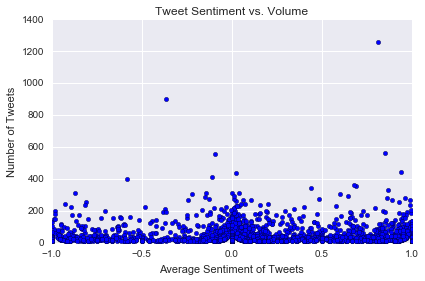

In [82]:
plt.scatter(x,y)
plt.xlim([-1,1])
plt.ylim([0,1400])
plt.title('Tweet Sentiment vs. Volume')
plt.ylabel('Number of Tweets')
plt.xlabel('Average Sentiment of Tweets')
plt.tight_layout()
plt.savefig('FIGS/SUBSET/sent_vs_volume.png')

In [79]:
from scipy.stats.stats import pearsonr   
print pearsonr(x,y)

(nan, 1.0)
